# Opening the data and putting it into an array. 

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.4 MB/s eta 0:00:00


In [ ]:
!pip install pymatreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy.io as io 
import matplotlib.pyplot as plt
import h5py
import mne
import pymatreader
import pandas as pd

In [ ]:
EEG = io.loadmat('drive/MyDrive/Thesis/EEG/sub_11.mat', squeeze_me=False, chars_as_strings=False, mat_dtype=True, struct_as_record=True)

In [ ]:
np.shape(EEG)

()

In [ ]:
print(EEG.keys())

dict_keys(['__header__', '__version__', '__globals__', 'hdr', 'fsample', 'trialinfo', 'sampleinfo', 'trial', 'time', 'label', 'cfg'])


In [ ]:
trials = EEG['trial']


In [ ]:
np.shape(trials)

(1, 224)

In [ ]:
#create info part for converting to mne
n_channels = 61
sampling_freq = 500 # in experiment sampling rate is 500hz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

In [ ]:
ch_names = ['Fp1'] + ['Fpz'] + ['Fp2'] + ['F7'] + ['F3'] + ['Fz'] + ['F4'] + ['F8'] + ['FC5'] + ['FC1']+ ['FC2'] + ['FC6']+ ['T7'] + ['C3']+ ['Cz'] + ['C4'] + ['T8']+ ['CP5'] + ['CP1'] + ['CP2']+ ['CP6'] + ['P7'] + ['P3']+ ['Pz'] + ['P4'] + ['P8']+ ['POz'] + ['O1'] + ['O2']+ ['AF7'] + ['AF3'] + ['AF4'] + ['AF8']+['F5']+['F1']+['F2']+['F6']+['FC3']+['FCz']+['FC4']+['C5']+['C1']+['C2']+['C6']+['CP3']+['CP4']+['P5']+['P1']+['P2']+['P6']+['PO5']+['PO3']+['PO4']+['PO6']+['FT7']+['FT8']+['TP7']+['TP8']+['PO7']+['PO8']+['Oz']
ch_types = ['eeg'] * 61
participant = 1 
info = mne.create_info(ch_names,ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')


In [ ]:
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>


In [ ]:
# trying to make the 3d array 
# first find the max value of the values of the channels 
# then make an empty array with shape(224, 61, maxi)
# then fill in all the variables from the trial part of the eeg data  in the empty array 

maxi = 0 
for i in range(0, len(trials[0])): 
  if len(trials[0][i][0]) > maxi: 
    maxi = len(trials[0][i][0])

print(maxi)

9596


In [ ]:
blank_array = np.zeros((224,61,maxi), dtype = 'float64')
print(blank_array.shape)

(224, 61, 9596)


In [ ]:
print(len(trials[0]))

224


In [ ]:
for i in range(0, len(trials[0])):
  print("done with trial ", i )
  for a in range(0, maxi):
    for o in range(0, len(trials[0][0])):
      try: 
        blank_array[i][o][a] = trials[0][i][o][a]
      except IndexError: 
        pass    

done with trial  0
done with trial  1
done with trial  2
done with trial  3
done with trial  4
done with trial  5
done with trial  6
done with trial  7
done with trial  8
done with trial  9
done with trial  10
done with trial  11
done with trial  12
done with trial  13
done with trial  14
done with trial  15
done with trial  16
done with trial  17
done with trial  18
done with trial  19
done with trial  20
done with trial  21
done with trial  22
done with trial  23
done with trial  24
done with trial  25
done with trial  26
done with trial  27
done with trial  28
done with trial  29
done with trial  30
done with trial  31
done with trial  32
done with trial  33
done with trial  34
done with trial  35
done with trial  36
done with trial  37
done with trial  38
done with trial  39
done with trial  40
done with trial  41
done with trial  42
done with trial  43
done with trial  44
done with trial  45
done with trial  46
done with trial  47
done with trial  48
done with trial  49
done with 

In [ ]:
print(len(trials[0][0][1]))
print(len(trials[0][223][0]))
print(blank_array[0][60][5625])
print(blank_array[0][60][5626])
print(blank_array[223][0][4955])
print(blank_array[223][0][4956])

4713
4869
0.0
0.0
0.0
0.0


In [ ]:
epochs = mne.EpochsArray(blank_array, info)

NameError: ignored

In [ ]:
info2 = mne.create_info(n_channels, sfreq=sampling_freq)
print(info2)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 61 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>


In [ ]:
print(epochs)

<EpochsArray |  224 events (all good), 0 - 12.764 sec, baseline off, ~665.5 MB, data loaded,
 '1': 224>


In [ ]:
ep_data = epochs._data

n_events = len(ep_data) # or len(epochs.events)
print("Number of events: " + str(n_events)) 

n_channels = len(ep_data[0,:]) # or len(epochs.ch_names)
print("Number of channels: " + str(n_channels))

n_times = len(ep_data[0,0,:]) # or len(epochs.times)
print("Number of time instances (for the longest one): " + str(n_times))

Number of events: 224
Number of channels: 61
Number of time instances (for the longest one): 9596


# Plotting the data to get further insight into the data itself 

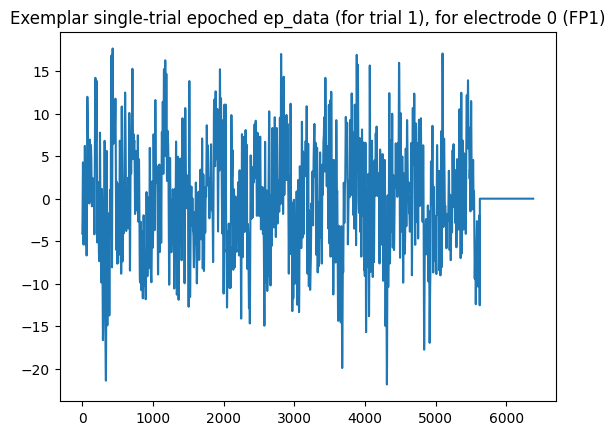

In [ ]:
plt.plot(ep_data[0,0,:].T)
plt.title("Exemplar single-trial epoched ep_data (for trial 1), for electrode 0 (FP1)")
plt.show()

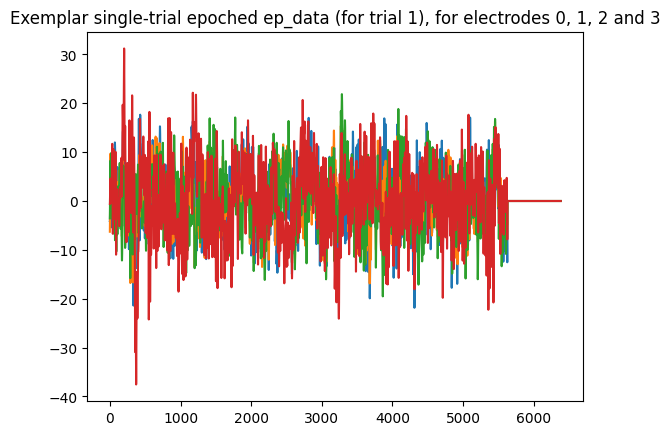

In [ ]:
plt.plot(ep_data[0,0:4,:].T)
plt.title("Exemplar single-trial epoched ep_data (for trial 1), for electrodes 0, 1, 2 and 3")
plt.show()

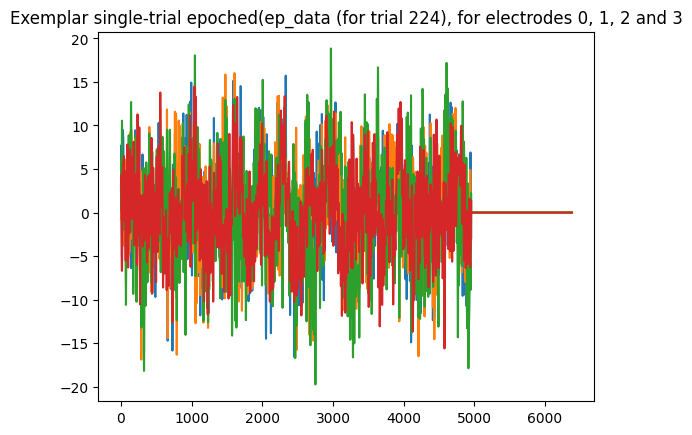

In [ ]:
plt.plot(ep_data[223,0:4,:].T)
plt.title("Exemplar single-trial epoched(ep_data (for trial 224), for electrodes 0, 1, 2 and 3")
plt.show()

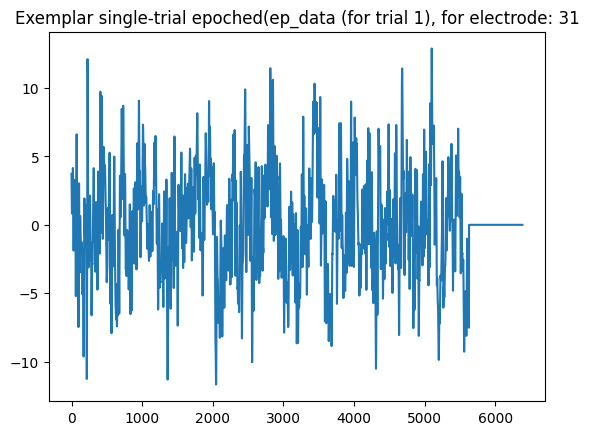

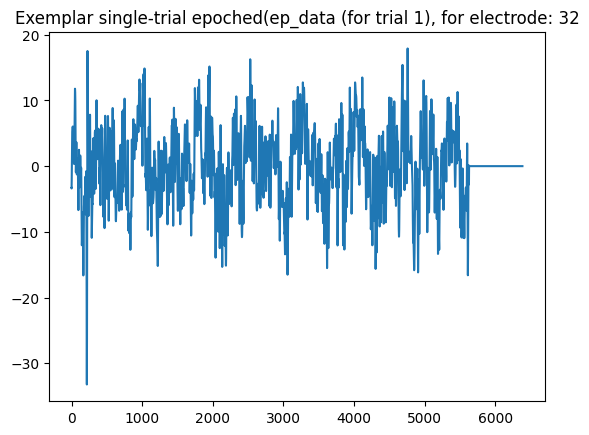

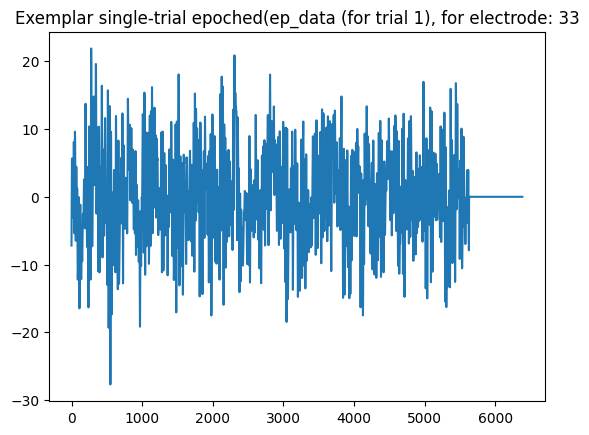

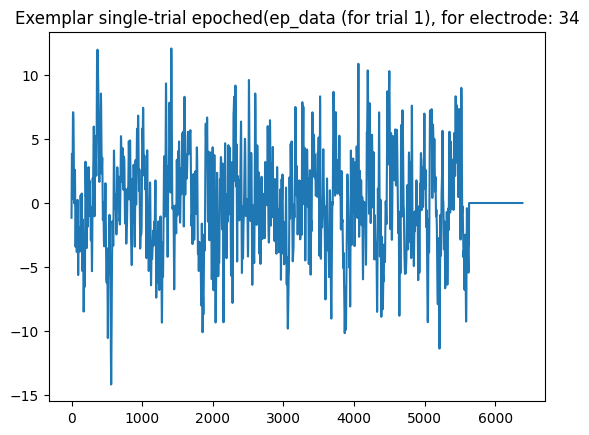

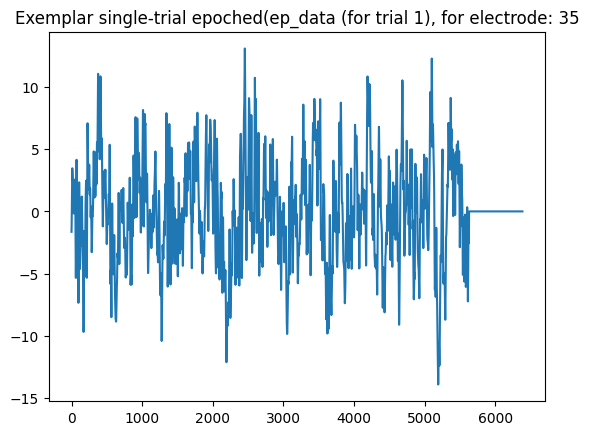

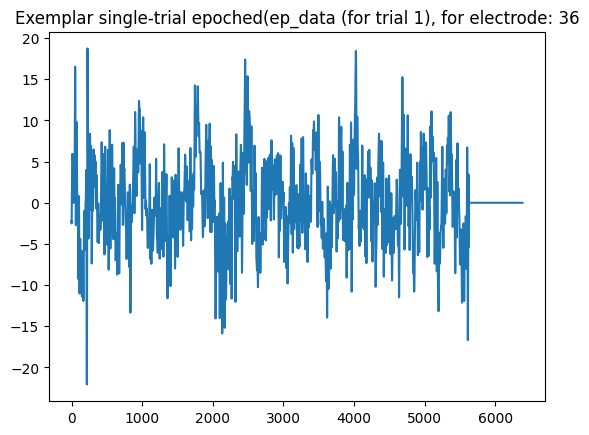

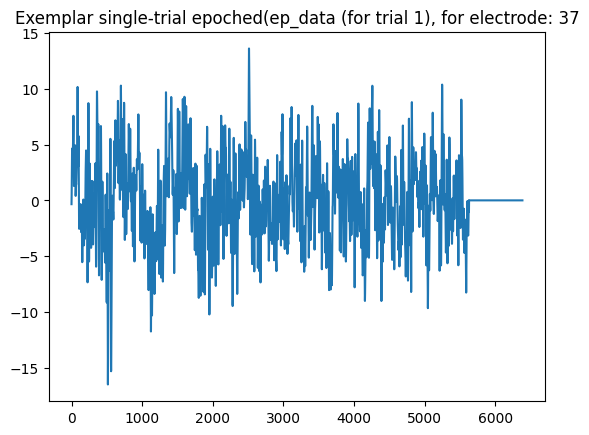

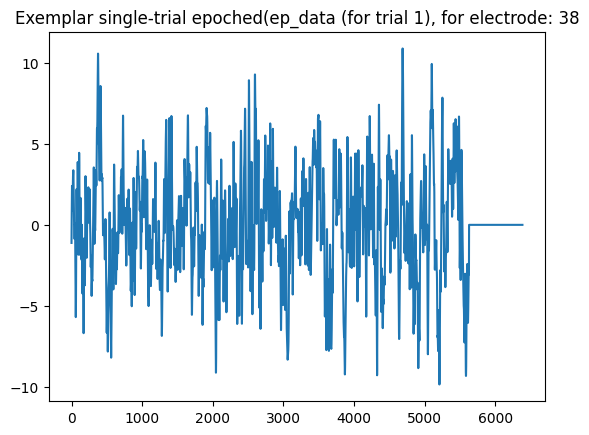

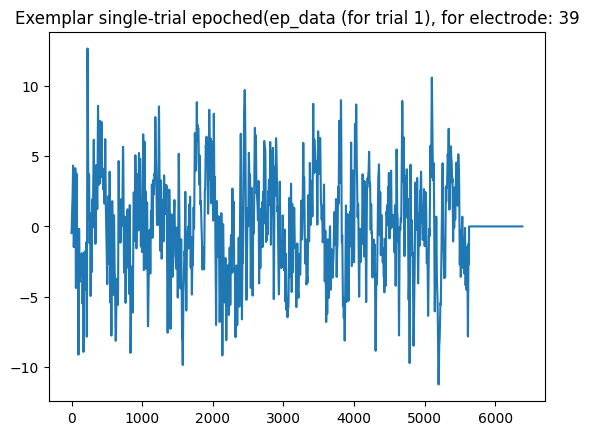

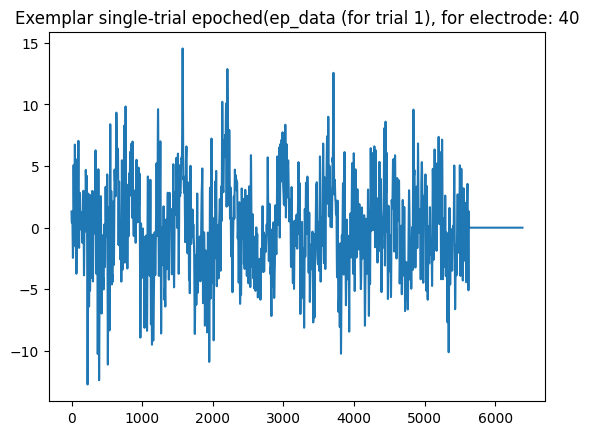

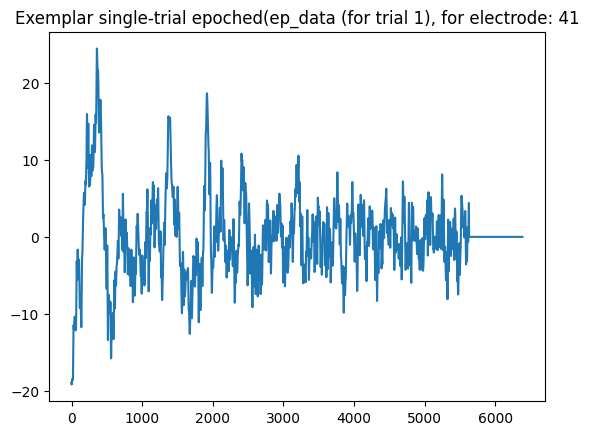

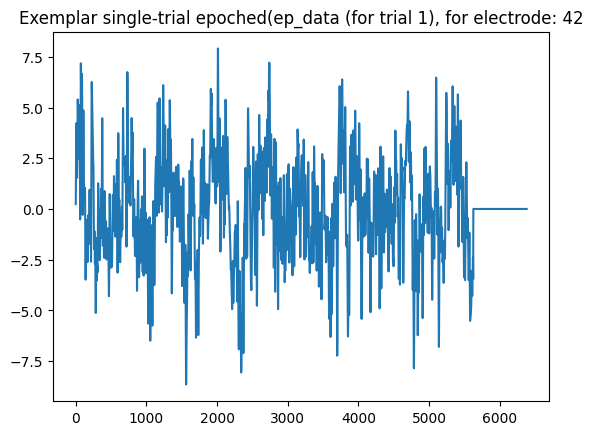

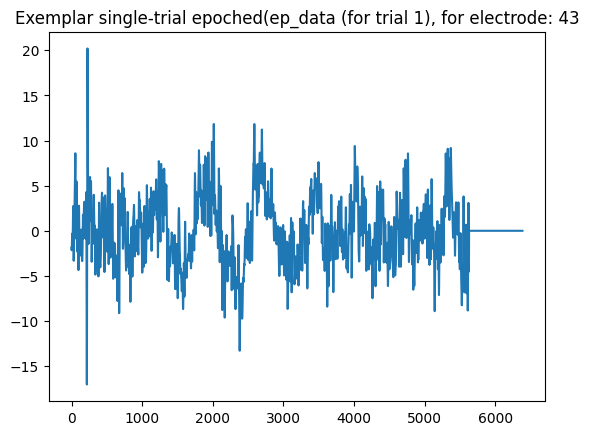

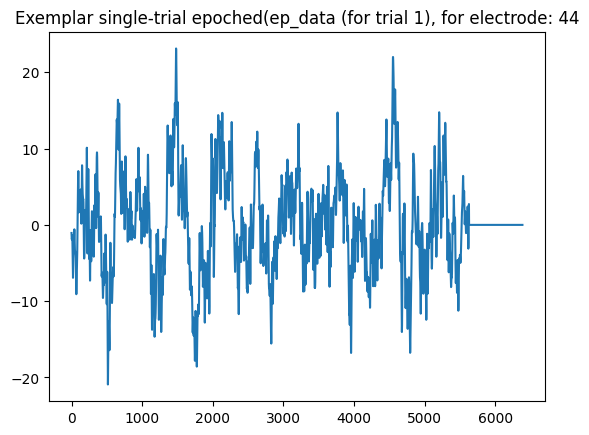

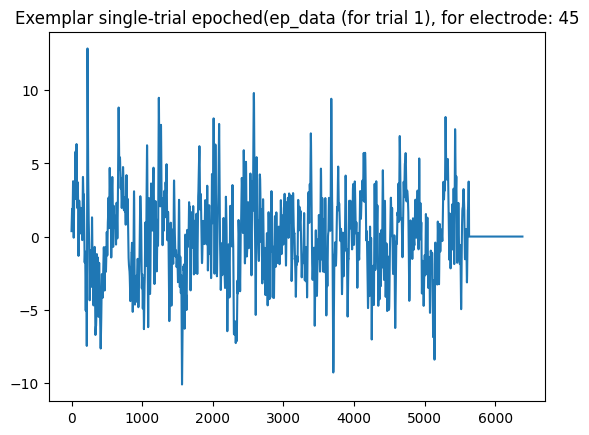

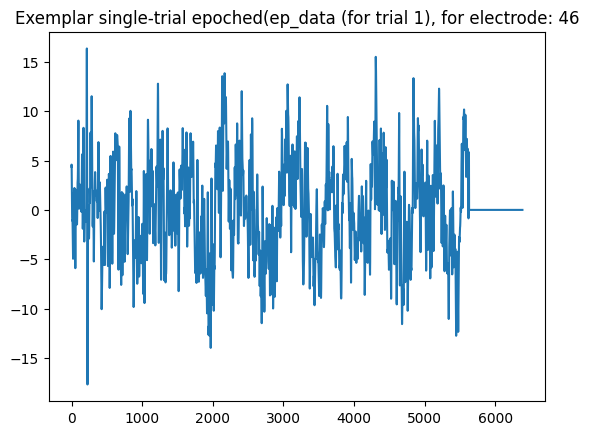

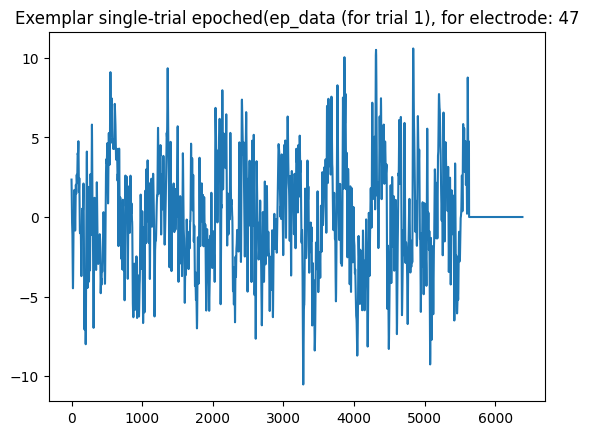

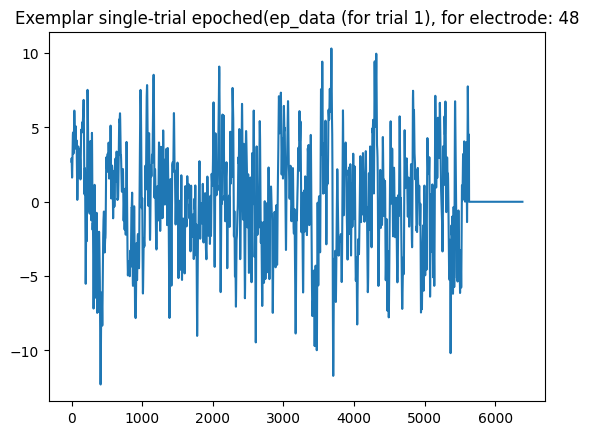

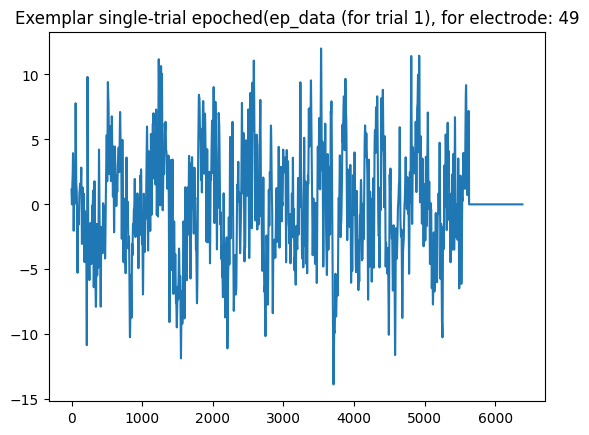

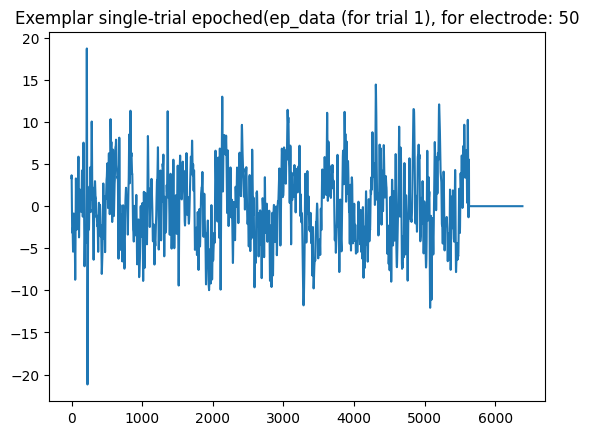

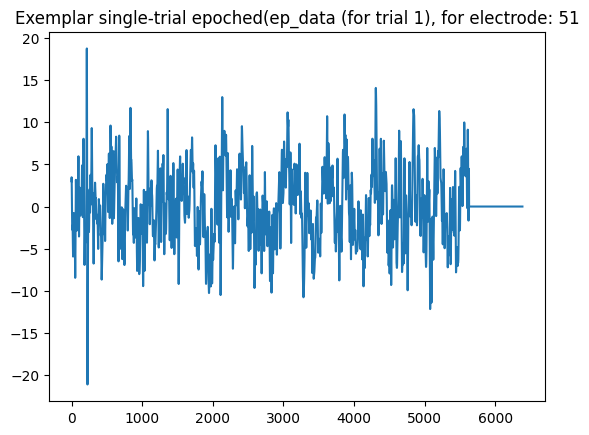

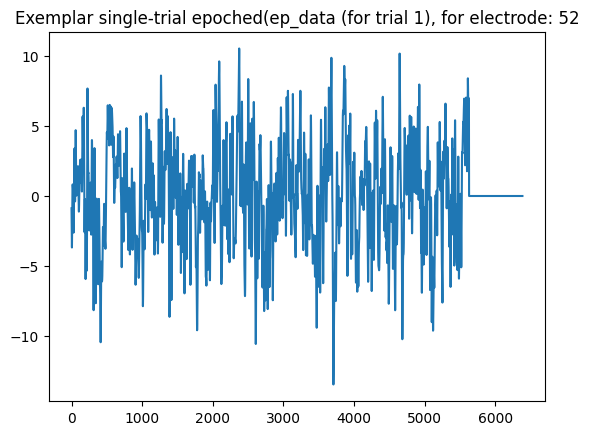

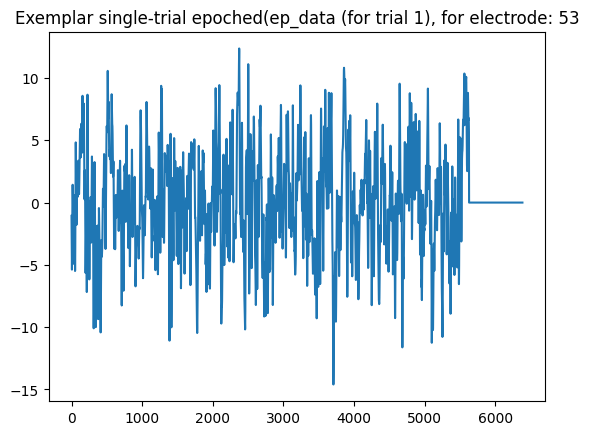

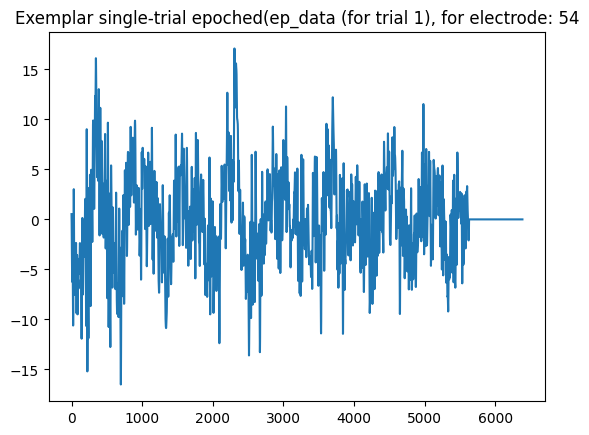

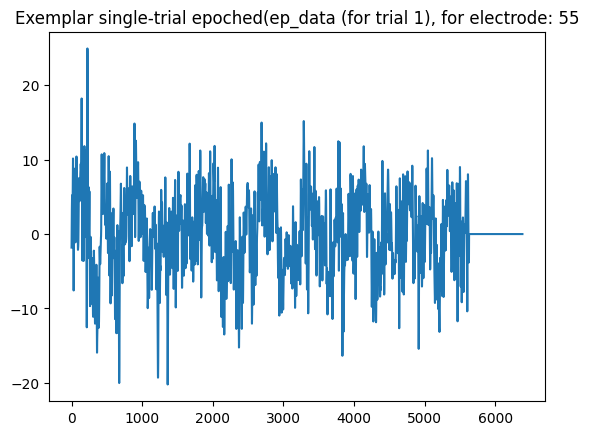

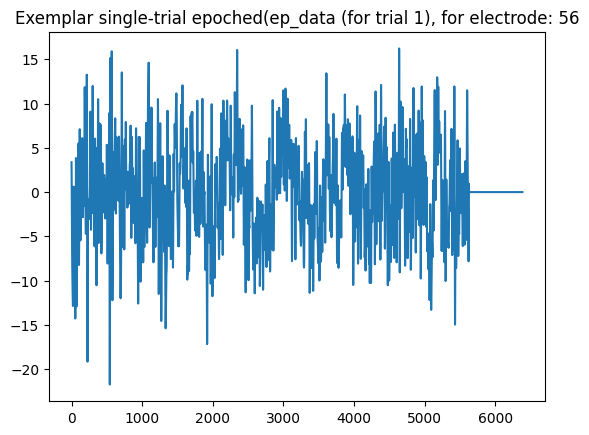

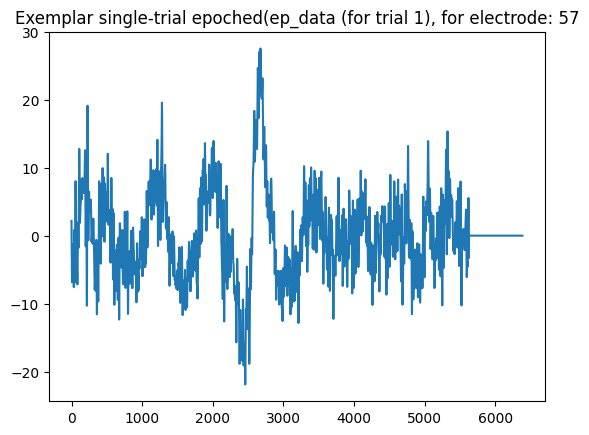

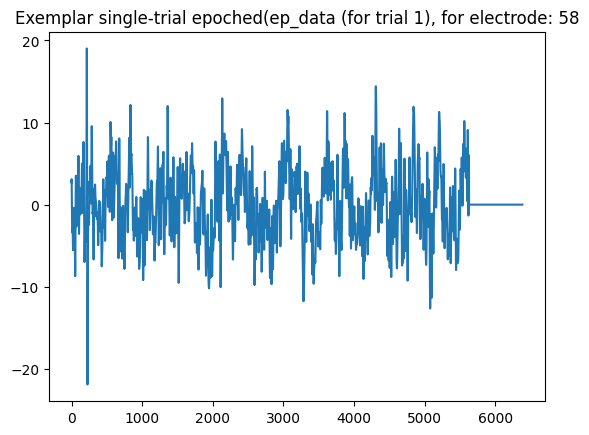

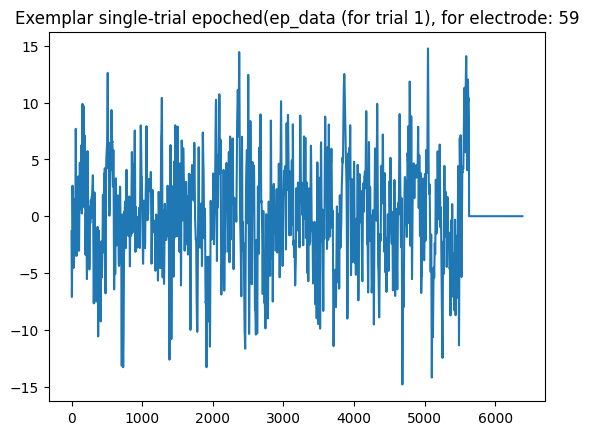

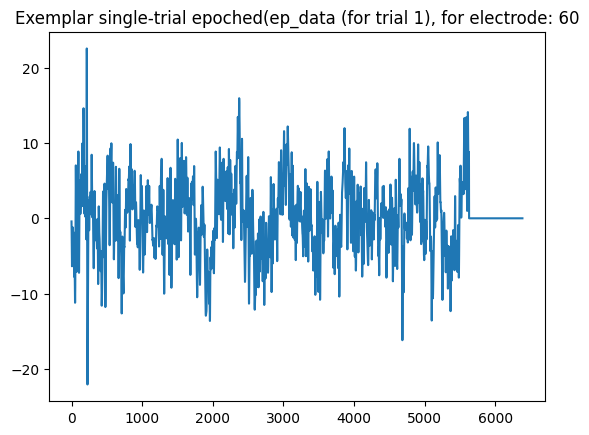

In [ ]:
for i in range(0, len(ep_data[0])):
  plt.plot(ep_data[0,i,:].T)
  plt.title("Exemplar single-trial epoched(ep_data (for trial 1), for electrode: " + str(i))
  plt.show()

In [ ]:
epochs.event_id
print(epochs.ch_names)

['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'O2', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Oz']


In [ ]:
d = {'Fp1':ep_data[0][0], 'Fpz':ep_data[0][1], 'Fp2':ep_data[0][2], 'F7':ep_data[0][3], 
     'F3':ep_data[0][4], 'Fz':ep_data[0][5], 'F4':ep_data[0][6], 'F8':ep_data[0][7]
     , 'FC5':ep_data[0][8], 'FC1':ep_data[0][9], 'FC2':ep_data[0][10], 'FC6':ep_data[0][11]
     , 'T7':ep_data[0][12], 'C3':ep_data[0][13], 'Cz':ep_data[0][14], 'C4':ep_data[0][15], 
     'T8':ep_data[0][16], 'CP5':ep_data[0][17], 'CP1':ep_data[0][18], 'CP2':ep_data[0][19], 
     'CP6':ep_data[0][20], 'P7':ep_data[0][21], 'P3':ep_data[0][22], 'Pz':ep_data[0][23], 
     'P4':ep_data[0][24], 'P8':ep_data[0][25], 'POz':ep_data[0][26], 'O1':ep_data[0][27], 
     'O2':ep_data[0][28], 'AF7':ep_data[0][29], 'AF3':ep_data[0][30], 'AF4':ep_data[0][31],
     'AF8':ep_data[0][32], 'F5':ep_data[0][33], 'F1':ep_data[0][34], 'F2':ep_data[0][35], 
     'F6':ep_data[0][36], 'FC3':ep_data[0][37], 'FCz':ep_data[0][38], 'FC4':ep_data[0][39],
     'C5':ep_data[0][40], 'C1':ep_data[0][41], 'C2':ep_data[0][42], 'C6':ep_data[0][43], 
     'CP3':ep_data[0][44], 'CP4':ep_data[0][45], 'P5':ep_data[0][46], 'P1':ep_data[0][47],
     'P2':ep_data[0][48], 'P6':ep_data[0][49], 'PO5':ep_data[0][50], 'PO3':ep_data[0][51],
     'PO4':ep_data[0][52], 'PO6':ep_data[0][53], 'FT7':ep_data[0][54], 'FT8':ep_data[0][55],
     'TP7':ep_data[0][56], 'TP8':ep_data[0][57], 'PO7':ep_data[0][58], 'PO8':ep_data[0][59], 'Oz':ep_data[0][60]}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
print(df)

           Fp1       Fpz       Fp2        F7        F3        Fz        F4  \
0    -4.109190 -6.291005 -3.556089 -0.601265 -2.994034 -1.276163  1.687636   
1    -4.061288 -5.234063 -2.396554 -0.399684 -2.090759 -0.897379  1.434163   
2    -3.570103 -3.253214 -0.513418  0.352491 -1.093794 -0.226311  1.311785   
3    -2.643324 -0.599535  1.810597  1.447032 -0.255921  0.617010  1.321161   
4    -1.361735  2.365844  4.208650  2.631231  0.193164  1.483537  1.442191   
...        ...       ...       ...       ...       ...       ...       ...   
6378  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6379  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6380  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6381  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6382  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            F8       FC5       FC1  ...       PO3       PO4    

#Putting the data into csv files of channel x value, so that it's a 2d file. So that it's saved per trial. Since there are 244 trials, there will be 244 csv files per participant 


In [ ]:
print(len(blank_array))
print(blank_array[0])
print(len(ep_data[0, :, :].T))
print(len(blank_array[0][0]))

224
[[ -5.38717477  -4.04406383  -3.12563082 ...   0.           0.
    0.        ]
 [-10.76303104  -9.01921693  -7.43293974 ...   0.           0.
    0.        ]
 [-13.90724285 -12.49707728 -10.98703098 ...   0.           0.
    0.        ]
 ...
 [ 10.01852511   9.35846353   8.60075184 ...   0.           0.
    0.        ]
 [  8.59316506   6.65001317   4.26029768 ...   0.           0.
    0.        ]
 [  5.95429312   4.75576515   3.57920321 ...   0.           0.
    0.        ]]


NameError: ignored

In [ ]:
np.save("my_array.npy", blank_array)

In [ ]:
i = 0
for trial in blank_array:
  i += 1
  name = f"trial_{i}"
  filename = f"{name}.csv"
  np.savetxt(filename, trial, delimiter = ',')

In [ ]:
# Use pandas to read the file 
df4 = pd.read_csv('trial_1.csv', header = None)

# Display the first few rows of trial 1 
print(df4.head())
# Display the last few rows of trial 1 
print("tail: ")
print(df4.tail())
# Display the info of trial 1 
print(df4.info())


        0          1          2         3         4         5         6     \
0  -5.387175  -4.044064  -3.125631 -2.739818 -2.843075 -3.273689 -3.817012   
1 -10.763031  -9.019217  -7.432940 -6.174111 -5.291961 -4.735450 -4.401746   
2 -13.907243 -12.497077 -10.987031 -9.584606 -8.394820 -7.421474 -6.604142   
3  -4.719260  -2.752163  -0.689218  1.254544  2.855552  3.917762  4.304896   
4  -7.371170  -6.586016  -5.703834 -4.801985 -3.937611 -3.144713 -2.439638   

       7         8         9     ...  9586  9587  9588  9589  9590  9591  \
0 -4.274663 -4.513076 -4.477847  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1 -4.188945 -4.031732 -3.907917  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2 -5.869062 -5.170017 -4.502648  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  3.964065  2.936347  1.350099  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4 -1.830163 -1.323103 -0.927137  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   9592  9593  9594  9595  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.

In [ ]:
#try if it also works for trial 224 
# Use pandas to read the file 
df5 = pd.read_csv('trial_224.csv', header = None)

# Display the first few rows of trial 1 
print(df5.head())
# Display the last few rows of trial 1 
print("tail: ")
print(df5.tail())
# Display the info of trial 1 
print(df5.info())

        0          1          2          3          4          5     \
0   4.225785   4.335391   5.069667   6.625022   8.996169  11.959698   
1   9.486180  10.320518  11.548527  13.276249  15.464357  17.927061   
2  10.206053  10.318795  10.872905  12.098292  14.038345  16.524214   
3  -3.824173  -3.491256  -2.594310  -1.156015   0.707748   2.789781   
4   6.083301   6.973302   7.783368   8.487155   9.062930   9.498349   

        6          7          8          9     ...  9586  9587  9588  9589  \
0  15.110779  17.944222  19.961429  20.779887  ...   0.0   0.0   0.0   0.0   
1  20.364747  22.421671  23.756700  24.114423  ...   0.0   0.0   0.0   0.0   
2  19.203805  21.617599  23.303339  23.906222  ...   0.0   0.0   0.0   0.0   
3   4.819439   6.511999   7.627527   8.023310  ...   0.0   0.0   0.0   0.0   
4   9.793985   9.964156  10.034522  10.037098  ...   0.0   0.0   0.0   0.0   

   9590  9591  9592  9593  9594  9595  
0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.

In [ ]:
import numpy as np
import glob

# Define the path to the directory where the trial CSV files are stored
trial_dir = "drive/MyDrive/Thesis/trials_sub1/"

#drive/MyDrive/Thesis/EEG/

# Get a list of all the trial CSV files
trial_files = glob.glob(trial_dir + "*.csv")

# Initialize an empty list to store the trial arrays
trial_arrays = []

# Loop through each trial CSV file
for file in trial_files:
    # Load the CSV file into a numpy array
    trial_data = np.loadtxt(file, delimiter=",")
    # Transpose the array so that the channels are in the first dimension and the timepoints are in the second dimension
    trial_data = trial_data.T
    # Append the trial array to the list of trial arrays
    trial_arrays.append(trial_data)


In [ ]:
print(trial_arrays)

[array([[-25.55380469, -27.63671895, -22.70655749, ...,   5.70441064,
         16.42424802,   7.72269231],
       [-26.33643653, -27.7312355 , -23.27857082, ...,   5.68783518,
         14.10441603,   7.45917276],
       [-26.98760629, -27.51186008, -23.70642549, ...,   5.59616792,
         11.64860665,   7.09575785],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]]), array([[12.8337193 ,  8.880652  , 12.01515782, ..., -1.45938947,
         0.3567405 , -3.10091169],
       [11.10769148,  7.41009358, 10.28007542, ..., -2.68810656,
         1.44948161, -3.30523018],
       [ 9.36778122,  5.88041723,  8.67366111, ..., -3.69849609,
         2.35994443, -3.36612571],
       ...,
       [ 0.        ,  0.        ,  0.

In [ ]:
freqs = np.logspace(np.log10(2), np.log10(50), 30)

In [ ]:
import numpy as np
from scipy.signal import morlet

# Define the frequency range of interest
freqs = np.logspace(np.log10(2), np.log10(30), 20)

# Define the length of the wavelet
# You can choose the length based on the frequency range
# For example, for frequencies between 2-30 Hz, a wavelet length of 200-300 is common
n_cycles = freqs / 2.0

# Define the sampling frequency
sfreq = 500.0

# Perform Morlet wavelet transform on each trial
power = []
for trial in trial_arrays:
    tfr = np.zeros((len(freqs), trial.shape[1]))
    for fi, freq in enumerate(freqs):
        wavelet = morlet(int(n_cycles[fi] * sfreq), w=7.0, s=1.0, complete=True)
        conv = np.convolve(trial, wavelet, 'same')
        tfr[fi, :] = np.abs(conv) ** 2
    power.append(tfr)

ValueError: ignored

TypeError: ignored

# Load the trialinfo of the data 



In [ ]:
EEG = io.loadmat('drive/MyDrive/Thesis/EEG/sub_11.mat')

In [ ]:
trial_info = EEG['trialinfo']
np.shape(trial_info)


(224, 17)

In [ ]:
print(type(trial_info))

<class 'numpy.ndarray'>


In [ ]:
pd.DataFrame(trial_info)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,1,1,1,1,1,1,33948,34469,36218,36480,36980,37677,37677,38181,1,1
1,2,4,7,2,1,1,2,39837,40369,42124,42387,42892,43530,43531,44037,1,0
2,2,3,6,2,2,1,1,46593,47118,48868,49125,49630,50588,50588,51093,1,1
3,2,3,5,2,1,1,1,52768,53288,55042,55305,55811,57256,57256,57761,1,1
4,1,1,2,1,2,1,1,58874,59400,61155,61417,61923,62818,62818,63318,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,4,8,7,2,1,2,4,1811347,1811872,1813621,1813885,1814390,1815210,1815210,1815710,1,1
220,3,5,1,1,1,2,3,1817922,1818440,1820197,1820465,1820966,1821702,1821702,1822203,1,1
221,4,7,6,2,2,2,3,1824454,1824972,1826728,1826995,1827497,1828246,1828246,1828747,1,1
222,4,7,5,2,1,2,3,1830584,1831096,1832853,1833109,1833609,1834634,1834634,1835140,1,1


# Splitting the data into congruent avatar, incongruent avatar, congruent stick cue and incongruent stick cue. 
* row 4 (in Python 3) is the row with valid (congruent) and invalid (incongruent)
* 1 = valid (congruent) and 2 = invalid (incongruent)

* Stick cue = trial 1 t/m 112
* Avatar cue = trial 113 t/m 224 


In [ ]:
import os
i = 0
for item in trial_info[:]: 
  i += 1 
  if item[3] == 1: 
    print("trial is valid")
    print(item[3])
    if i > 0 and i <= 112: 
      old_name = r"trial_"+ str(i) + ".csv"
      new_name = r"valid_stick_trial_"+ str(i) + ".csv"
      os.rename(old_name, new_name)
    else: 
      old_name = r"trial_"+ str(i) + ".csv"
      new_name = r"valid_avatar_trial_"+ str(i) + ".csv"
      os.rename(old_name, new_name)      

  else: 
    print("trial is invalid")
    print(item[3])
    if i > 0 and i <= 112: 
      old_name = r"trial_"+ str(i) + ".csv"
      new_name = r"invalid_stick_trial_"+ str(i) + ".csv"
      os.rename(old_name, new_name)
    else: 
      old_name = r"trial_"+ str(i) + ".csv"
      new_name = r"invalid_avatar_trial_"+ str(i) + ".csv"
      os.rename(old_name, new_name)      

trial is valid
1
trial is invalid
2
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is valid
1
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is invalid
2
trial is valid
1
trial is invalid
2
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is valid
1
trial is invalid
2
trial is valid
1
trial is invalid
2
trial is valid
1
trial is valid
1
trial is valid
1
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is invalid
2
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is valid
1
trial is valid
1
trial is valid
1
trial is invalid
2
trial is invalid
2
trial is valid
1
trial is valid
1
trial is valid
1
trial is invalid
2
trial is valid
1
trial is valid
1
trial is valid
1
trial is invalid
2
trial is va

In [ ]:
trial_data = []
labels = []

for trial_number in range(1, 245):
    try:
        valid_stick = pd.read_csv(f'valid_stick_trial_{trial_number}.csv', header=None)
        trial_data.append(valid_stick)
        labels.append(0)
    except FileNotFoundError:
        pass
    
    try:
        valid_avatar = pd.read_csv(f'valid_avatar_trial_{trial_number}.csv', header=None)
        trial_data.append(valid_avatar)
        labels.append(1)
    except FileNotFoundError:
        pass
    
    try:
        invalid_stick = pd.read_csv(f'invalid_stick_trial_{trial_number}.csv', header=None)
        trial_data.append(invalid_stick)
        labels.append(2)
    except FileNotFoundError:
        pass
    
    try:
        invalid_avatar = pd.read_csv(f'invalid_avatar_trial_{trial_number}.csv', header=None)
        trial_data.append(invalid_avatar)
        labels.append(3)
    except FileNotFoundError:
        pass

data = pd.concat(trial_data, axis=0)
data.to_csv('combined_data_sub' + str(a) + '.csv', index=False)
    

# Save as single file? with the labels? Since the files need to be combined to be used as training and test data. 

In [ ]:
valid_stick = pd.read_csv(f'valid_stick_trial_78.csv', header=None)
invalid_stick = pd.read_csv(f'invalid_stick_trial_20.csv', header=None)
another = pd.read_csv(f'invalid_stick_trial_16.csv', header=None)
df = pd.DataFrame(valid_stick)
df2 = pd.DataFrame(invalid_stick)
df3 = pd.DataFrame(another)
ha = pd.DataFrame.transpose(df) 
haha = pd.DataFrame.transpose(df2)
hahaha = pd.DataFrame.transpose(df3)

trial_data = pd.DataFrame()
list_labels = []

#append
df = trial_data.append(ha)
list_labels.extend([0for i in range(maxi)])
ultimate_df = pd.concat([df, haha], ignore_index = True)
list_labels.extend([1 for i in range(maxi)])
ulti_ulti_df = pd.concat([ultimate_df, hahaha], ignore_index = True)
list_labels.extend([2 for i in range(maxi)])
ulti_ulti_df["labels"] = list_labels




ha["labels"] =  maxi * [0]

<ipython-input-158-23c9a1be701f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = trial_data.append(ha)


In [ ]:
print(ulti_ulti_df)

              0         1         2         3         4         5         6  \
0      7.548785 -0.169432  1.153261  8.550926 -3.393221 -0.518617  0.155307   
1      6.801406 -1.288088  0.979741  7.817496 -3.212698 -0.484659  0.211682   
2      5.662963 -1.996843  1.157416  6.835271 -2.985811 -0.483157 -0.025728   
3      4.337783 -2.146980  1.681712  5.642877 -2.785143 -0.532000 -0.540004   
4      3.085082 -1.641676  2.506843  4.332775 -2.681781 -0.643814 -1.284726   
...         ...       ...       ...       ...       ...       ...       ...   
19144  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19145  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19146  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19147  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19148  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              7         8         9  ...        52 

In [ ]:
"""trial_data = pd.DataFrame({'Fp1': pd.Series(dtype='float'), 'Fpz': pd.Series(dtype='float') ,'Fp2': pd.Series(dtype='float'), 'F7': pd.Series(dtype='float')
      , 'F3': pd.Series(dtype='float'), 'Fz': pd.Series(dtype='float'), 'F4': pd.Series(dtype='float'), 'F8': pd.Series(dtype='float'), 'FC5': pd.Series(dtype='float'),
      'FC1': pd.Series(dtype='float'), 'FC2': pd.Series(dtype='float'), 'FC6': pd.Series(dtype='float'), 'T7': pd.Series(dtype='float'), 'C3': pd.Series(dtype='float'), 
      'Cz': pd.Series(dtype='float'), 'C4': pd.Series(dtype='float'), 'T8': pd.Series(dtype='float'), 'CP5': pd.Series(dtype='float'), 'CP1': pd.Series(dtype='float'),
       'CP2': pd.Series(dtype='float'), 'CP6': pd.Series(dtype='float'), 'P7': pd.Series(dtype='float'), 'P3': pd.Series(dtype='float'), 'Pz': pd.Series(dtype='float'), 
       'P4': pd.Series(dtype='float'), 'P8': pd.Series(dtype='float'), 'POz': pd.Series(dtype='float'), 'O1': pd.Series(dtype='float'), 'O2': pd.Series(dtype='float'),
       'AF7': pd.Series(dtype='float'), 'AF3': pd.Series(dtype='float'), 'AF4': pd.Series(dtype='float'),'AF8': pd.Series(dtype='float'), 'F5': pd.Series(dtype='float'),
     'F1': pd.Series(dtype='float'), 'F2': pd.Series(dtype='float'), 'F6': pd.Series(dtype='float'), 'FC3': pd.Series(dtype='float'), 'FCz': pd.Series(dtype='float'), 
     'FC4': pd.Series(dtype='float'),'C5': pd.Series(dtype='float'), 'C1': pd.Series(dtype='float'), 'C2': pd.Series(dtype='float'), 'C6': pd.Series(dtype='float'),
      'CP3': pd.Series(dtype='float'), 'CP4': pd.Series(dtype='float'), 'P5': pd.Series(dtype='float'), 'P1': pd.Series(dtype='float'),'P2': pd.Series(dtype='float'),
       'P6': pd.Series(dtype='float'), 'PO5': pd.Series(dtype='float'), 'PO3': pd.Series(dtype='float'),'PO4': pd.Series(dtype='float'), 'PO6': pd.Series(dtype='float'),
        'FT7': pd.Series(dtype='float'), 'FT8': pd.Series(dtype='float'),'TP7': pd.Series(dtype='float'), 'TP8': pd.Series(dtype='float'), 'PO7': pd.Series(dtype='float'),
         'PO8': pd.Series(dtype='float'), 'Oz': pd.Series(dtype='float'), 'labels': pd.Series(dtype='int'), 'participant': pd.Series(dtype='int')})

"""

trial_data = None
list_labels = []

for trial_number in range(1, 244):
    try:
        valid_stick = pd.read_csv(f'valid_stick_trial_{trial_number}.csv', header=None)
        df = pd.DataFrame(valid_stick)
        dftr = pd.DataFrame.transpose(df) 
       # trial_data.loc[len(df.index)] = dftr 
        trial_data = pd.concat([trial_data, dftr], ignore_index = True)
        list_labels.extend([1 for i in range(maxi)])
    except FileNotFoundError:
        pass
    
    try:
        valid_avatar = pd.read_csv(f'valid_avatar_trial_{trial_number}.csv', header=None)
        df2 = pd.DataFrame(valid_avatar)
        dftr2 = pd.DataFrame.transpose(df2) 
        #trial_data.loc[len(df.index)] = dftr2
        trial_data = pd.concat([trial_data, dftr2], ignore_index = True)
        #trial_data["labels"] = maxi * [1]
        list_labels.extend([3 for i in range(maxi)])
    except FileNotFoundError:
        pass
    
    try:
        invalid_stick = pd.read_csv(f'invalid_stick_trial_{trial_number}.csv', header=None)
        if trial_data is None: 
          dftr3 = pd.DataFrame.transpose(invalid_stick)
          trial_data = pd.DataFrame(dftr3)
          list_labels.extend([2 for i in range(maxi)])
        else: 
          df3 = pd.DataFrame(invalid_stick)
          dftr3 = pd.DataFrame.transpose(df3)
          trial_data = pd.concat([dftr3, trial_data], ignore_index = True)
          list_labels.extend([2 for i in range(maxi)])
    except FileNotFoundError:
        pass
    
    try:
        invalid_avatar = pd.read_csv(f'invalid_avatar_trial_{trial_number}.csv', header=None)
        df4 = pd.DataFrame(invalid_avatar)
        dftr4 = pd.DataFrame.transpose(df4)
        #trial_data.loc[len(df.index)] = dftr4
        trial_data = pd.concat([dftr4, trial_data], ignore_index = True)
        list_labels.extend([4 for i in range(maxi)])
    except FileNotFoundError:
        pass

trial_data["labels"] = list_labels

In [ ]:
trial_data = None
list_labels = []
list_trial = []


for trial_number in range(1, 245):
  try:
    valid_stick = pd.read_csv(f'valid_stick_trial_{trial_number}.csv', header=None)
    if trial_data is None: 
      dftr = pd.DataFrame.transpose(valid_stick)
      trial_data = pd.DataFrame(dftr)
      list_labels.extend([1 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
    else:             
      df = pd.DataFrame(valid_stick)
      dftr = pd.DataFrame.transpose(df) 
      trial_data = pd.concat([trial_data, dftr], ignore_index = True)
      list_labels.extend([1 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
  except FileNotFoundError:
    pass
#2  
  try:
     valid_avatar = pd.read_csv(f'valid_avatar_trial_{trial_number}.csv', header=None)
     if trial_data is None: 
      dftr2 = pd.DataFrame.transpose(valid_avatar)
      trial_data = pd.DataFrame(dftr2)
      list_labels.extend([3 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
     else:             
      df2 = pd.DataFrame(valid_avatar)
      dftr2 = pd.DataFrame.transpose(df2) 
      trial_data = pd.concat([trial_data, dftr2], ignore_index = True)
      list_labels.extend([3 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
  except FileNotFoundError:
    pass
#3    
  try:
    invalid_stick = pd.read_csv(f'invalid_stick_trial_{trial_number}.csv', header=None)
    if trial_data is None: 
      dftr3 = pd.DataFrame.transpose(invalid_stick)
      trial_data = pd.DataFrame(dftr3)
      list_labels.extend([2 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
    else: 
      df3 = pd.DataFrame(invalid_stick)
      dftr3 = pd.DataFrame.transpose(df3)
      trial_data = pd.concat([trial_data, dftr3], ignore_index = True)
      list_labels.extend([2 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
  except FileNotFoundError:
    pass
#4    
  try:
    invalid_avatar = pd.read_csv(f'invalid_avatar_trial_{trial_number}.csv', header=None)
    if trial_data is None: 
      dftr4 = pd.DataFrame.transpose(invalid_avatar)
      trial_data = pd.DataFrame(dftr4)
      list_labels.extend([4 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
    else: 
      df4 = pd.DataFrame(invalid_avatar)
      dftr4 = pd.DataFrame.transpose(df4)
      trial_data = pd.concat([trial_data, dftr4], ignore_index = True)
      list_labels.extend([4 for i in range(maxi)])
      list_trial.extend([trial_number for i in range(maxi)])
  except FileNotFoundError:
    pass

In [ ]:
print(trial_data)

               0          1          2         3         4         5   \
0       -5.387175 -10.763031 -13.907243 -4.719260 -7.371170  1.986422   
1       -4.044064  -9.019217 -12.497077 -2.752163 -6.586016  2.318285   
2       -3.125631  -7.432940 -10.987031 -0.689218 -5.703834  2.373175   
3       -2.739818  -6.174111  -9.584606  1.254544 -4.801985  2.135741   
4       -2.843075  -5.291961  -8.394820  2.855552 -3.937611  1.645064   
...           ...        ...        ...       ...       ...       ...   
2149499  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   
2149500  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   
2149501  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   
2149502  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   
2149503  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   

               6          7         8         9   ...         51        52  \
0        0.564562 -14.500424 -6.026111  1.366

In [ ]:
trial_data["labels"] = list_labels
trial_data["trial_num"] = list_trial

In [ ]:
print(trial_data.head())

          0          1          2         3         4         5         6  \
0 -5.387175 -10.763031 -13.907243 -4.719260 -7.371170  1.986422  0.564562   
1 -4.044064  -9.019217 -12.497077 -2.752163 -6.586016  2.318285  0.695964   
2 -3.125631  -7.432940 -10.987031 -0.689218 -5.703834  2.373175  0.515591   
3 -2.739818  -6.174111  -9.584606  1.254544 -4.801985  2.135741  0.053009   
4 -2.843075  -5.291961  -8.394820  2.855552 -3.937611  1.645064 -0.610983   

           7         8         9  ...        53         54         55  \
0 -14.500424 -6.026111  1.366886  ...  7.980347 -12.308737 -10.196316   
1 -14.260915 -5.124605  1.900565  ...  6.043768 -11.558776 -10.523322   
2 -13.670670 -3.829137  2.293013  ...  3.746773 -10.273637 -10.569921   
3 -12.786115 -2.283536  2.510297  ...  1.249151  -8.527888 -10.360515   
4 -11.672731 -0.683730  2.553031  ... -1.249153  -6.469288  -9.958306   

         56        57         58        59        60  labels  trial_num  
0 -4.770738 -3.270313  1

In [ ]:
print(trial_data.tail())

           0    1    2    3    4    5    6    7    8    9  ...   53   54   55  \
2149499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2149500  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2149501  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2149502  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2149503  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

          56   57   58   59   60  labels  trial_num  
2149499  0.0  0.0  0.0  0.0  0.0       3        224  
2149500  0.0  0.0  0.0  0.0  0.0       3        224  
2149501  0.0  0.0  0.0  0.0  0.0       3        224  
2149502  0.0  0.0  0.0  0.0  0.0       3        224  
2149503  0.0  0.0  0.0  0.0  0.0       3        224  

[5 rows x 63 columns]


In [ ]:
trial_data.rename(columns={0: "Fp1", 1: "Fpz", 2:"Fp2" , 3: "F7" , 4:"F3" , 5:"Fz" , 6:"F4"  , 7:"F8" , 8:"FC5", 9:"FC1", 10: "FC2"
                            , 11: "FC6", 12:"T7" , 13:"C3", 14:"Cz", 15:"C4", 16:"T8", 17:"CP5", 18:"CP1", 19:"CP2", 20:"CP6"
                            , 21: "P7", 22: "P3", 23: "Pz", 24: "P4", 25: "P8", 26:"POz", 27:"O1", 28:"O2", 29: "AF7", 30:"AF3"
                            , 31: "AF4", 32:"AF8", 33:"F5", 34:"F1", 35:"F2", 36:"F6", 37:"FC3", 38:"FCz", 39:"FC4", 40:"C5"
                            , 41: "C1", 42:"C2", 43:"C6", 44:"CP3", 45:"CP4", 46:"P5", 47:"P1", 48:"P2", 49:"P6", 50:"PO5"
                            , 51: "PO3", 52:"PO4", 53:"PO6", 54:"FT7", 55:"FT8", 56:"TP7", 57:"TP8", 58:"PO7", 59:"PO8", 60:"Oz"})


,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,PO6,FT7,FT8,TP7,TP8,PO7,PO8,Oz,labels,trial_num
0,-7.817542,-12.268580,-4.753405,1.701432,-3.448174,-6.995626,-6.479935,3.006080,5.386229,-3.120533,...,-2.217970,5.605376,6.897894,7.235091,7.525710,-2.742324,-3.500543,-3.481803,1,1
1,-11.640908,-15.557526,-8.275785,2.412116,-4.700163,-8.342774,-6.736788,3.805425,6.012369,-4.021813,...,-1.311448,6.909201,7.331127,9.318305,8.616016,-1.646436,-2.263603,-2.632001,1,1
2,-14.896969,-18.017413,-10.588665,3.461655,-5.892017,-9.464523,-5.964663,4.815920,6.474022,-4.999512,...,-0.765230,7.950039,7.739486,10.897441,9.194031,-0.548652,-1.436785,-1.971565,1,1
3,-17.120676,-19.310016,-11.361651,4.726061,-6.886109,-10.226004,-4.179045,5.946210,6.708143,-5.937685,...,-0.737429,8.594482,8.065557,11.734716,9.177849,0.339994,-1.194773,-1.677727,1,1
4,-18.021681,-19.280346,-10.510547,6.020829,-7.559917,-10.550612,-1.577353,7.050267,6.681968,-6.722586,...,-1.310939,8.765579,8.231698,11.738473,8.549942,0.876870,-1.632554,-1.860228,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,224
2149500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,224
2149501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,224
2149502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,224


In [ ]:
data = pd.concat(trial_data, axis=0)
data.to_csv('combined_data_sub' + str(a) + '.csv', index=False)

In [ ]:
# Display the first few rows
print(data.head())

# Display a summary of the DataFrame
print(data.info())

print(data.tail())

# Generate descriptive statistics
print(data.describe())

# Check the shape of the DataFrame
print(data.shape)


       0         1         2         3         4         5         6     \
0 -4.109190 -4.061288 -3.570103 -2.643324 -1.361735  0.128856  1.636633   
1 -6.291005 -5.234063 -3.253214 -0.599535  2.365844  5.227279  7.585043   
2 -3.556089 -2.396554 -0.513418  1.810597  4.208650  6.289063  7.707438   
3 -0.601265 -0.399684  0.352491  1.447032  2.631231  3.660587  4.343175   
4 -2.994034 -2.090759 -1.093794 -0.255921  0.193164  0.105858 -0.542605   

       7         8         9     ...  6373  6374  6375  6376  6377  6378  \
0  2.951557  3.877267  4.262057  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  9.126295  9.679843  9.242253  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  8.235254  7.807526  6.538022  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  4.570090  4.327783  3.690531  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4 -1.642628 -2.970572 -4.235960  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   6379  6380  6381  6382  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0 

In [ ]:
print(labels)

[2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3]


In [ ]:
data.to_csv('combined_data.csv', index=False)